#**School of Computer Science and Engineering**
#**DIGITAL ASSIGNMENT :-  Practice Problem set(Part - 1 + Part-2)**
#**Code:** MCSE602P
#**Course Title:** Machine Learning Lab
#**Faculty:** Prof.G.N. Balaji
#**Name :** Nidhi Singh
#**Register No. :** 22MAI0015


#**1. Create a dataset using an API with Python (Use Web Scrapping/web crawling to create your own dataset) from anyone (discussed in class) of the following application domains.**

#a. IMDB

#b. Flipkart

#c. Amazon

#d. Twitter



#STEP 1 :- IMDB DATASET CREATION

In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from time import sleep
from random import randint 


In [16]:
headers={'Accept-Language':'en-US,en;q=0.5'}

In [17]:
page=np.arange(1,1000,100)

#Code for getting the link of all top 1000 movies of IMDB

In [18]:
pages=[]
for x in page:
  pages.append(f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={x}&ref_=adv_nxt")

In [19]:
links=[]
for x in pages:
  response = requests.get(x)
  soup=BeautifulSoup(response.text,'html.parser')
  for movie in soup.select(".lister-item-header"):
    tag=movie.select_one("a")["href"]
    link=f"https://www.imdb.com{tag}reviews?ref_=tt_urv"
    links.append(link)

In [20]:
np.count_nonzero(links)

1000

#code for getting all the reviews of top 1000 movies on IMDB

In [ ]:
reviews = []
for x in links:
  session = requests.Session()
  response = requests.get(x)
  soup = BeautifulSoup(response.text, 'html.parser')
  review_headings = soup.select(".title")
  for s in review_headings:
      review = s.text.strip()
      reviews.append(review)
  load_more = soup.find('div', class_='load-more-data')
  base_url = load_more['data-ajaxurl']
  data_key = load_more['data-key'] if len(review_headings)>25 else ''
  load_more_url = f"https://m.imdb.com{base_url}?ref_=undefined&paginationKey={data_key}"
  while load_more_url:
    response = session.post(load_more_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    review_headings = soup.select(".title")
    for s in review_headings:
      review = s.text.strip()
      reviews.append(review)
    load_more = soup.find('div', class_='load-more-data')
    if not load_more:
      break
    data_key = load_more['data-key']
    load_more_url = f"https://m.imdb.com{base_url}?ref_=undefined&paginationKey={data_key}"
  print(links.index(x))  
    

0
1
2
3
4
5
6
7
8


**Numbers of reviews :**

In [9]:
np.count_nonzero(reviews)

505677


***creating dataframe of reviews***

In [11]:
review_DF=pd.DataFrame({'Review':reviews})

# **Converting dataframe into CSV file dataset**

In [ ]:
review_DF.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_LAB_ASSIGN/IMDB_REVIEW_NOTEBOOKS/IMDB dataset/IMDB_MOVIE_REVIEWS_DATASET_UNCLASSIFIED.csv', index=False)

#**Labeling a dataset for sentiment analysis involves assigning sentiment labels to the text data in my dataset.**

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels


In [22]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def classify_review(review):
  score = sid.polarity_scores(review)
  print(score)
  if score['compound'] >=0:
    return 'positive'
  else:
    return 'negative'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
file_path='/content/drive/MyDrive/Colab Notebooks/ML_LAB_ASSIGN/IMDB_REVIEW_NOTEBOOKS/IMDB dataset/IMDB_MOVIE_REVIEWS_DATASET_UNCLASSIFIED.csv'
df=pd.read_csv(file_path)

In [24]:
df.head()

Review  Unnamed: 1  Unnamed: 2  \
0           Some birds aren't meant to be caged.         NaN         NaN   
1  An incredible movie. One that lives with you.         NaN         NaN   
2                          Don't Rent Shawshank.         NaN         NaN   
3              This is How Movies Should Be Made         NaN         NaN   
4  A classic piece of unforgettable film-making.         NaN         NaN   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0         NaN          NaN          NaN          NaN  
1         NaN          NaN          NaN          NaN  
2         NaN          NaN          NaN          NaN  
3         NaN          NaN          NaN          NaN  
4         NaN          NaN          NaN          NaN

In [25]:
df = df.iloc[:, :1]

In [26]:
df.head()

Review
0           Some birds aren't meant to be caged.
1  An incredible movie. One that lives with you.
2                          Don't Rent Shawshank.
3              This is How Movies Should Be Made
4  A classic piece of unforgettable film-making.

In [27]:
df = df.dropna()
df=df[~df.astype(str).apply(lambda x: x.str.isnumeric()).any(axis=1)]

In [28]:
Sentiments_data=[]
for index, row in df.iterrows():
  sentiment = classify_review(row['Review'])
  Sentiments_data.append(sentiment)


Streaming output truncated to the last 5000 lines.
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'compound': -0.0951}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.223, 'pos': 0.777, 'compound': 0.5411}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.162, 'neu': 0.662, 'pos': 0.175, 'compound': 0.0516}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6588}
{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.7783}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4653}
{'neg': 0.0, 

In [33]:
np.count_nonzero(Sentiments_data)

505423

In [34]:
df['Sentiment_Labels']=Sentiments_data

In [35]:
df.head()

Review Sentiment_Labels
0           Some birds aren't meant to be caged.         positive
1  An incredible movie. One that lives with you.         positive
2                          Don't Rent Shawshank.         positive
3              This is How Movies Should Be Made         positive
4  A classic piece of unforgettable film-making.         positive

In [36]:
df

Review Sentiment_Labels
0                    Some birds aren't meant to be caged.         positive
1           An incredible movie. One that lives with you.         positive
2                                   Don't Rent Shawshank.         positive
3                       This is How Movies Should Be Made         positive
4           A classic piece of unforgettable film-making.         positive
...                                                   ...              ...
505671             Very good technically, but depressing.         negative
505672                      Pointless nihilistic bullshit         negative
505673  good movie, but wished there had been less foc...         positive
505674                                           Splendid         positive
505675  Mystic River shows that our "present" is affec...         negative

[505423 rows x 2 columns]

#classified labeled dataset

In [37]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_LAB_ASSIGN/IMDB_REVIEW_NOTEBOOKS/classified_IMDB TOP 1000 Movies_review.csv')

#**2. Apply pre-processing techniques such as**
• Stopwords Removal

• URL Removal

• Stemming

• Lemmatization

• Convert Numbers to Words

• Tokenization

• Unigram/Bigram Approach

etc.,
Intermediate Result: Show Pre-processed data in each

#**Preprocessing a dataset for sentiment analysis involves cleaning and transforming the raw text data into a format that can be used effectively by machine learning models.** 

In [38]:
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels


In [41]:
pip install num2words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from num2words import num2words
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# Step 1: Load the IMDb movie review dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_LAB_ASSIGN/IMDB_REVIEW_NOTEBOOKS/IMDB_MAIN_PROJECT_CODE_FILE/classified_IMDB TOP 1000 Movies_review.csv')  # Adapt the filename to your dataset



In [116]:
df.head()

Unnamed: 0                                         Review Sentiment_Labels
0           0           Some birds aren't meant to be caged.         positive
1           1  An incredible movie. One that lives with you.         positive
2           2                          Don't Rent Shawshank.         positive
3           3              This is How Movies Should Be Made         positive
4           4  A classic piece of unforgettable film-making.         positive

In [117]:
df = df.iloc[:, 1:3]
df.head()

Review Sentiment_Labels
0           Some birds aren't meant to be caged.         positive
1  An incredible movie. One that lives with you.         positive
2                          Don't Rent Shawshank.         positive
3              This is How Movies Should Be Made         positive
4  A classic piece of unforgettable film-making.         positive

Text(0.5, 1.0, 'Sentiment distribution')

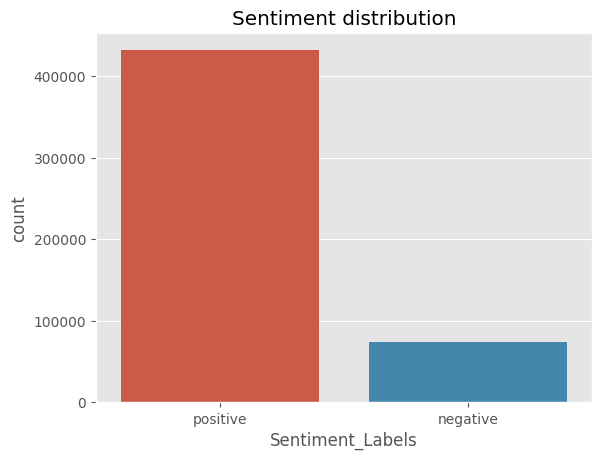

In [118]:
sns.countplot(x='Sentiment_Labels', data=df)
plt.title("Sentiment distribution")

In [119]:
for i in range(5):
    print("Review: ", [i])
    print(df['Review'].iloc[i], "\n")
    print("Sentiment: ", df['Sentiment_Labels'].iloc[i], "\n\n")

Review:  [0]
Some birds aren't meant to be caged. 

Sentiment:  positive 


Review:  [1]
An incredible movie. One that lives with you. 

Sentiment:  positive 


Review:  [2]
Don't Rent Shawshank. 

Sentiment:  positive 


Review:  [3]
This is How Movies Should Be Made 

Sentiment:  positive 


Review:  [4]
A classic piece of unforgettable film-making. 

Sentiment:  positive 




In [120]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [121]:
df['word_count'] = df['Review'].apply(no_of_words)

In [122]:
df.head()

Review Sentiment_Labels  word_count
0           Some birds aren't meant to be caged.         positive           7
1  An incredible movie. One that lives with you.         positive           8
2                          Don't Rent Shawshank.         positive           3
3              This is How Movies Should Be Made         positive           7
4  A classic piece of unforgettable film-making.         positive           6

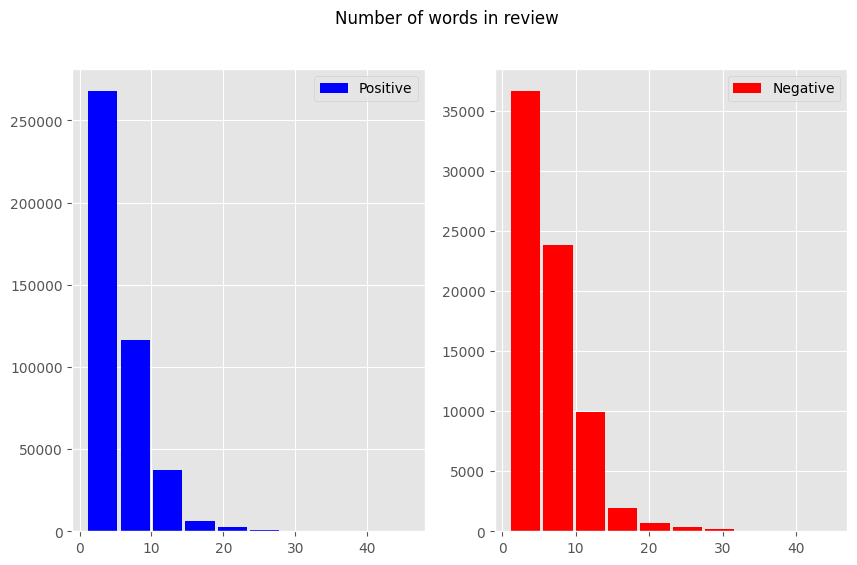

In [123]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['Sentiment_Labels'] == 'positive']['word_count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['Sentiment_Labels'] == 'negative']['word_count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

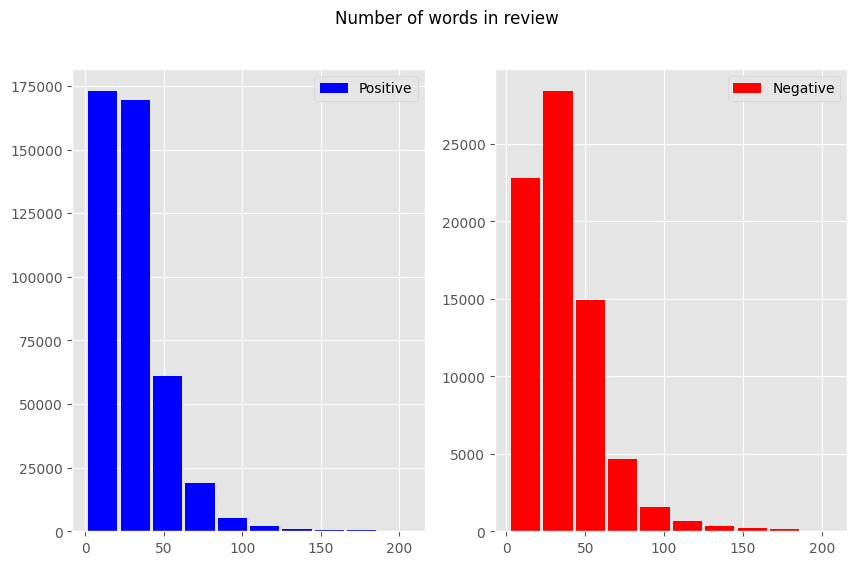

In [124]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['Sentiment_Labels'] == 'positive']['Review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['Sentiment_Labels'] == 'negative']['Review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [125]:
df.Sentiment_Labels.replace("positive", 1, inplace=True)
df.Sentiment_Labels.replace("negative", 0, inplace=True)

In [126]:
df.head()

Review  Sentiment_Labels  word_count
0           Some birds aren't meant to be caged.                 1           7
1  An incredible movie. One that lives with you.                 1           8
2                          Don't Rent Shawshank.                 1           3
3              This is How Movies Should Be Made                 1           7
4  A classic piece of unforgettable film-making.                 1           6

# **2. Apply pre-processing techniques such as**
##Stopwords Removal
##URL Removal
##Stemming
##Lemmatization
##Convert Numbers to Words
##Tokenization
##Unigram/Bigram Approach
etc.

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [128]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#**Clean the text data**

In [134]:
def clean_text(text):
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = re.sub('', '', text) 
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
     

In [130]:
df.Review = df['Review'].apply(clean_text)


In [131]:
df

Review  Sentiment_Labels  \
0                                 birds arent meant caged                 1   
1                              incredible movie one lives                 1   
2                                     dont rent shawshank                 1   
3                                             movies made                 1   
4                  classic piece unforgettable filmmaking                 1   
...                                                   ...               ...   
505418                        good technically depressing                 0   
505419                      pointless nihilistic bullshit                 0   
505420  good movie wished less focus criminal investig...                 1   
505421                                           splendid                 1   
505422           mystic river shows present affected past                 0   

        word_count  
0                7  
1                8  
2                3  
3                7  
4                6  
...            ...  
505418           5  
505419           3  
505420          22  
505421           1  
505422          11  

[505423 rows x 3 columns]

In [135]:
df.word_count= df['Review'].apply(no_of_words)

In [136]:
df

Review  Sentiment_Labels  \
0                                 birds arent meant caged                 1   
1                              incredible movie one lives                 1   
2                                     dont rent shawshank                 1   
3                                             movies made                 1   
4                  classic piece unforgettable filmmaking                 1   
...                                                   ...               ...   
505418                        good technically depressing                 0   
505419                      pointless nihilistic bullshit                 0   
505420  good movie wished less focus criminal investig...                 1   
505421                                           splendid                 1   
505422           mystic river shows present affected past                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

#**Tokenization of  the reviews text**


In [137]:
df.Review= df['Review'].apply(word_tokenize)

In [138]:
df

Review  Sentiment_Labels  \
0                            [birds, arent, meant, caged]                 1   
1                         [incredible, movie, one, lives]                 1   
2                                 [dont, rent, shawshank]                 1   
3                                          [movies, made]                 1   
4             [classic, piece, unforgettable, filmmaking]                 1   
...                                                   ...               ...   
505418                    [good, technically, depressing]                 0   
505419                  [pointless, nihilistic, bullshit]                 0   
505420  [good, movie, wished, less, focus, criminal, i...                 1   
505421                                         [splendid]                 1   
505422    [mystic, river, shows, present, affected, past]                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

#**Perform stemming**


In [67]:
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: [stemmer.stem(token) for token in x])
# The preprocessed data with stemming is now available in the 'Reviews' column of the DataFrame.
df

Review  Sentiment_Labels  \
0                            [birds, arent, meant, caged]                 1   
1                         [incredible, movie, one, lives]                 1   
2                                 [dont, rent, shawshank]                 1   
3                                          [movies, made]                 1   
4             [classic, piece, unforgettable, filmmaking]                 1   
...                                                   ...               ...   
505418                    [good, technically, depressing]                 0   
505419                  [pointless, nihilistic, bullshit]                 0   
505420  [good, movie, wished, less, focus, criminal, i...                 1   
505421                                         [splendid]                 1   
505422    [mystic, river, shows, present, affected, past]                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

#**Remove stop words**


In [139]:
stop_words = set(stopwords.words('english'))
df.Review = df['Review'].apply(lambda x: [token for token in x if token.lower() not in stop_words])
# The preprocessed data is now available in the 'Reviews' column of the DataFrame.
df 

Review  Sentiment_Labels  \
0                            [birds, arent, meant, caged]                 1   
1                         [incredible, movie, one, lives]                 1   
2                                 [dont, rent, shawshank]                 1   
3                                          [movies, made]                 1   
4             [classic, piece, unforgettable, filmmaking]                 1   
...                                                   ...               ...   
505418                    [good, technically, depressing]                 0   
505419                  [pointless, nihilistic, bullshit]                 0   
505420  [good, movie, wished, less, focus, criminal, i...                 1   
505421                                         [splendid]                 1   
505422    [mystic, river, shows, present, affected, past]                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

In [140]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#**Perform lemmatization**


In [141]:
lemmatizer = WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# The preprocessed data with lemmatization is now available in the 'Reviews' column of the DataFrame.

In [142]:
df

Review  Sentiment_Labels  \
0                             [bird, arent, meant, caged]                 1   
1                          [incredible, movie, one, life]                 1   
2                                 [dont, rent, shawshank]                 1   
3                                           [movie, made]                 1   
4             [classic, piece, unforgettable, filmmaking]                 1   
...                                                   ...               ...   
505418                    [good, technically, depressing]                 0   
505419                  [pointless, nihilistic, bullshit]                 0   
505420  [good, movie, wished, le, focus, criminal, inv...                 1   
505421                                         [splendid]                 1   
505422     [mystic, river, show, present, affected, past]                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

#**Convert numbers to words**


In [71]:
def convert_numbers_to_words(tokens):
    converted_tokens = []
    for token in tokens:
        if token.isdigit():
            converted_token = num2words(int(token))
            converted_tokens.append(converted_token)
        else:
            converted_tokens.append(token)
    return converted_tokens


In [72]:
df['Review'] = df['Review'].apply(convert_numbers_to_words)
# The preprocessed data with converted numbers to words is now available in the 'Reviews' column of the DataFrame.
df

Review  Sentiment_Labels  \
0                             [bird, arent, meant, caged]                 1   
1                          [incredible, movie, one, life]                 1   
2                                 [dont, rent, shawshank]                 1   
3                                           [movie, made]                 1   
4             [classic, piece, unforgettable, filmmaking]                 1   
...                                                   ...               ...   
505418                    [good, technically, depressing]                 0   
505419                  [pointless, nihilistic, bullshit]                 0   
505420  [good, movie, wished, le, focus, criminal, inv...                 1   
505421                                         [splendid]                 1   
505422     [mystic, river, show, present, affected, past]                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

#**Apply the Unigram/Bigram approach**

In [143]:
def generate_ngrams(tokens, n):
    ngram_list = list(ngrams(tokens, n))
    ngrams_joined = [' '.join(ngram) for ngram in ngram_list]
    return ngrams_joined

df['Review'] = df['Review'].apply(lambda x: generate_ngrams(x, 1))  # Generate unigrams
# The preprocessed data with unigrams and bigrams is now available in the 'unigrams' and 'bigrams' columns of the DataFrame.


In [144]:
df

Review  Sentiment_Labels  \
0                             [bird, arent, meant, caged]                 1   
1                          [incredible, movie, one, life]                 1   
2                                 [dont, rent, shawshank]                 1   
3                                           [movie, made]                 1   
4             [classic, piece, unforgettable, filmmaking]                 1   
...                                                   ...               ...   
505418                    [good, technically, depressing]                 0   
505419                  [pointless, nihilistic, bullshit]                 0   
505420  [good, movie, wished, le, focus, criminal, inv...                 1   
505421                                         [splendid]                 1   
505422     [mystic, river, show, present, affected, past]                 0   

        word_count  
0                4  
1                4  
2                3  
3                2  
4                4  
...            ...  
505418           3  
505419           3  
505420          12  
505421           1  
505422           6  

[505423 rows x 3 columns]

In [145]:
import pandas as pd
df.Review = df['Review'].apply(lambda x: ' '.join(x))
# Print the DataFrame
print(df)


                                                   Review  Sentiment_Labels  \
0                                  bird arent meant caged                 1   
1                               incredible movie one life                 1   
2                                     dont rent shawshank                 1   
3                                              movie made                 1   
4                  classic piece unforgettable filmmaking                 1   
...                                                   ...               ...   
505418                        good technically depressing                 0   
505419                      pointless nihilistic bullshit                 0   
505420  good movie wished le focus criminal investigat...                 1   
505421                                           splendid                 1   
505422            mystic river show present affected past                 0   

        word_count  
0                4  
1        

#**Removal of dublicate Reviews**

In [146]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  178166


In [147]:
df = df.drop_duplicates('Review')

In [148]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


#**Count the number of words into the reviews**

In [149]:
df.word_count = df['Review'].apply(no_of_words)
df.head()

<ipython-input-149-7c7c6fd12498>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.word_count = df['Review'].apply(no_of_words)


Review  Sentiment_Labels  word_count
0                  bird arent meant caged                 1           4
1               incredible movie one life                 1           4
2                     dont rent shawshank                 1           3
3                              movie made                 1           2
4  classic piece unforgettable filmmaking                 1           4

In [150]:
pos_reviews = df[df.Sentiment_Labels ==1]
pos_reviews.head()

Review  Sentiment_Labels  word_count
0                  bird arent meant caged                 1           4
1               incredible movie one life                 1           4
2                     dont rent shawshank                 1           3
3                              movie made                 1           2
4  classic piece unforgettable filmmaking                 1           4

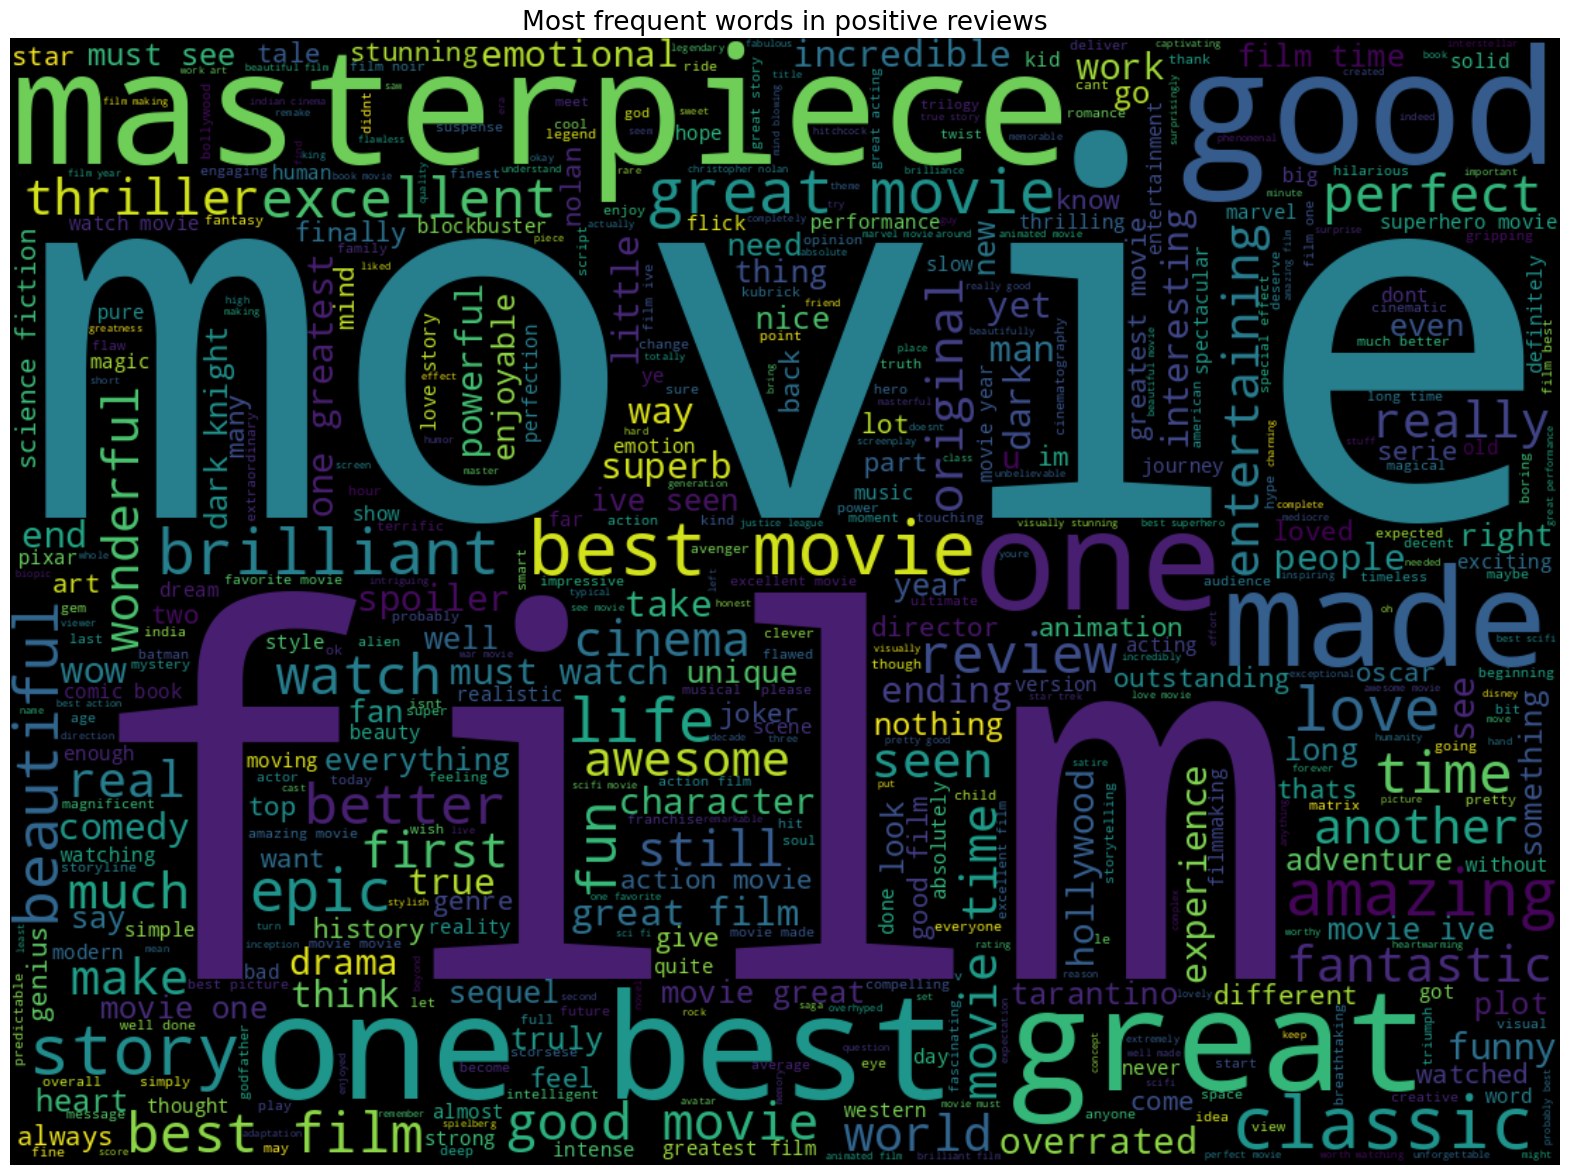

In [176]:
text = ' '.join([word for word in pos_reviews['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1100, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [152]:
from collections import Counter
count = Counter()
for text in pos_reviews['Review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(1000)

[('movie', 45120),
 ('film', 28052),
 ('best', 22007),
 ('one', 15278),
 ('great', 15258),
 ('good', 11609),
 ('ever', 10171),
 ('time', 8622),
 ('story', 7960),
 ('masterpiece', 7651),
 ('classic', 5521),
 ('watch', 5187),
 ('made', 4829),
 ('love', 4567),
 ('amazing', 4524),
 ('like', 4494),
 ('better', 4236),
 ('greatest', 4177),
 ('beautiful', 3973),
 ('life', 3931),
 ('brilliant', 3795),
 ('seen', 3750),
 ('year', 3739),
 ('action', 3677),
 ('see', 3672),
 ('excellent', 3638),
 ('perfect', 3496),
 ('still', 3419),
 ('epic', 3210),
 ('well', 3206),
 ('review', 3147),
 ('cinema', 3080),
 ('make', 2999),
 ('dont', 2952),
 ('must', 2870),
 ('much', 2710),
 ('first', 2703),
 ('way', 2661),
 ('really', 2615),
 ('performance', 2591),
 ('get', 2545),
 ('fun', 2504),
 ('dark', 2439),
 ('thriller', 2422),
 ('acting', 2390),
 ('another', 2354),
 ('true', 2346),
 ('overrated', 2304),
 ('scifi', 2179),
 ('new', 2159),
 ('long', 2127),
 ('ive', 2126),
 ('comedy', 2111),
 ('work', 2095),
 ('ente

In [153]:
pos_words = pd.DataFrame(count.most_common(100))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0  movie  45120
1   film  28052
2   best  22007
3    one  15278
4  great  15258

In [154]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [155]:
neg_reviews = df[df.Sentiment_Labels == 0]
neg_reviews.head()

Review  Sentiment_Labels  \
10                        alltime prison film classic                 0   
16                              go prison learn crook                 0   
18  im convicted murderer provides sound financial...                 0   
20                                    never give hope                 0   
23  shawshank redemption prison film redeemed quality                 0   

    word_count  
10           4  
16           4  
18           7  
20           3  
23           6

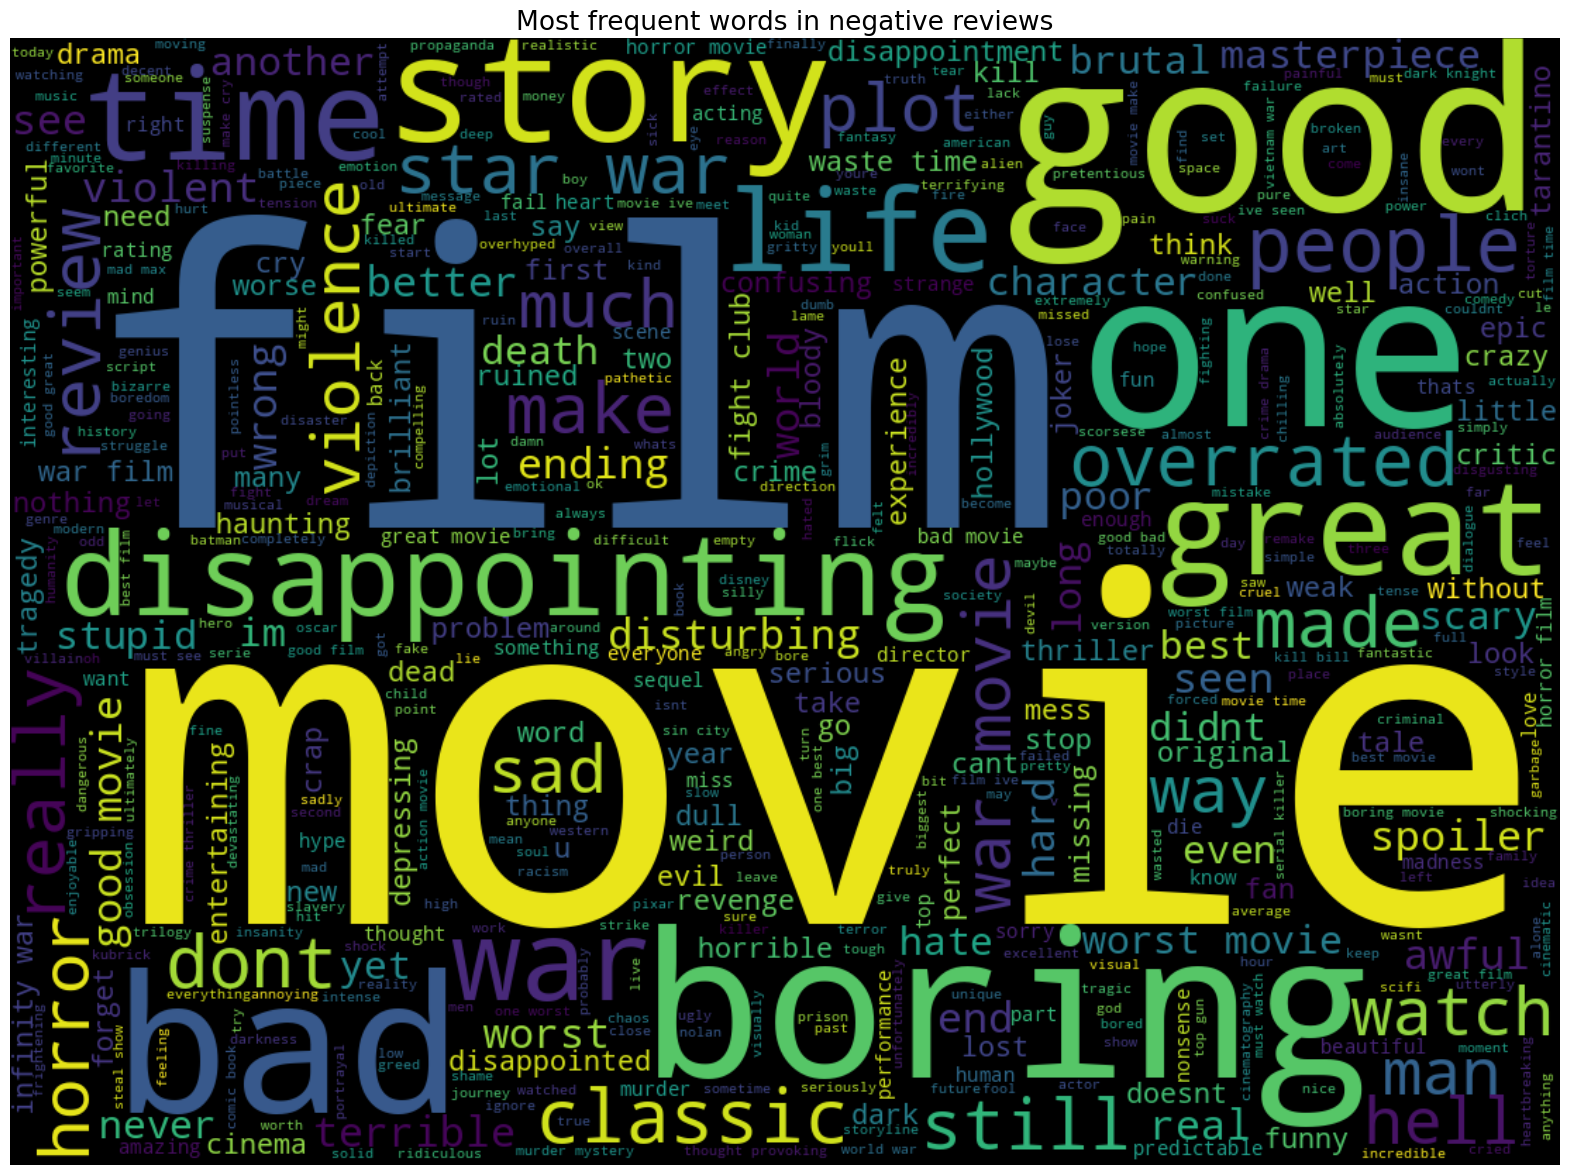

In [177]:
text = ' '.join([word for word in neg_reviews['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1100, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [157]:
count = Counter()
for text in neg_reviews['Review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(1000)

[('movie', 8040),
 ('film', 4599),
 ('good', 3041),
 ('war', 2898),
 ('one', 2131),
 ('bad', 2091),
 ('boring', 1872),
 ('time', 1605),
 ('story', 1460),
 ('ever', 1384),
 ('great', 1317),
 ('like', 1302),
 ('horror', 1249),
 ('worst', 1245),
 ('dont', 1126),
 ('make', 851),
 ('watch', 815),
 ('life', 810),
 ('best', 800),
 ('classic', 789),
 ('disappointing', 747),
 ('people', 742),
 ('star', 742),
 ('made', 739),
 ('overrated', 721),
 ('get', 694),
 ('crime', 675),
 ('hard', 661),
 ('really', 661),
 ('man', 648),
 ('review', 645),
 ('seen', 644),
 ('wrong', 623),
 ('plot', 615),
 ('see', 609),
 ('way', 606),
 ('still', 589),
 ('world', 584),
 ('long', 583),
 ('much', 582),
 ('better', 579),
 ('hell', 562),
 ('never', 561),
 ('violence', 555),
 ('disturbing', 551),
 ('spoiler', 549),
 ('poor', 538),
 ('waste', 535),
 ('terrible', 521),
 ('action', 506),
 ('awful', 499),
 ('didnt', 497),
 ('im', 496),
 ('sad', 494),
 ('ending', 494),
 ('first', 491),
 ('well', 487),
 ('hate', 487),
 ('

In [158]:
neg_words = pd.DataFrame(count.most_common(1000))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie   8040
1   film   4599
2   good   3041
3    war   2898
4    one   2131

In [159]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

In [160]:
X = df['Review']
Y = df['Sentiment_Labels']

#**Preprocessed dataset**

In [161]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_LAB_ASSIGN/IMDB_REVIEW_NOTEBOOKS/IMDB_MAIN_PROJECT_CODE_FILE/processed_classified_IMDB TOP 1000 Movies_review.csv')

#**3. Apply feature selection algorithms to extract the predominant features.**

In [162]:
review_dataset = df.iloc[:, 0:2]
review_dataset.columns = ['review', 'label']
review_dataset

review  label
0                                  bird arent meant caged      1
1                               incredible movie one life      1
2                                     dont rent shawshank      1
3                                              movie made      1
4                  classic piece unforgettable filmmaking      1
...                                                   ...    ...
505417                 id love worship temple sean devine      1
505418                        good technically depressing      0
505419                      pointless nihilistic bullshit      0
505420  good movie wished le focus criminal investigat...      1
505422            mystic river show present affected past      0

[325831 rows x 2 columns]

In [163]:
review_dataset.label.replace(1, "positive", inplace=True)
review_dataset.label.replace(0, "negative", inplace=True)
review_dataset

review     label
0                                  bird arent meant caged  positive
1                               incredible movie one life  positive
2                                     dont rent shawshank  positive
3                                              movie made  positive
4                  classic piece unforgettable filmmaking  positive
...                                                   ...       ...
505417                 id love worship temple sean devine  positive
505418                        good technically depressing  negative
505419                      pointless nihilistic bullshit  negative
505420  good movie wished le focus criminal investigat...  positive
505422            mystic river show present affected past  negative

[325831 rows x 2 columns]

In [164]:
review_dataset.groupby('label').count()

review
label           
negative   56854
positive  268977

In [165]:
review_dataset['label'].value_counts(normalize=True)

positive    0.825511
negative    0.174489
Name: label, dtype: float64

In [166]:
#splitting into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(review_dataset['review'],
                                                    review_dataset['label'],
                                                    random_state = 0)

In [167]:
#feature extraction: ngram
vectorizer = CountVectorizer(ngram_range = (1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)

X_train_vectorized.toarray().shape

(244373, 439157)

#**4. Use Classification algorithms for classification such as**
**a. Naive Bayes**

**b. Multinomial Naive Bayes**

**c. SVM**

**d. Random Forest**

In [ ]:
#creating multinomial naive bayes

review_predictor = MultinomialNB(alpha = 0.1)
review_predictor.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=0.1)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
#using test dataset

predictions = review_predictor.predict(vectorizer.transform(X_test))
print("Accuracy: ", 100 * sum(predictions == Y_test) / len(predictions), "%")

Accuracy:  89.54430504063444 %


In [ ]:
#using real life examples

review_predictor.predict(vectorizer.transform(
    [
        "Good Movie",
        "Worth to watch",
        "Worst Movie ever",
        "Waste of time and Money"
    ]
))
   

array(['positive', 'positive', 'negative', 'negative'], dtype='<U8')

#**5. Interpret the result**

**a. Print confusion matrix**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion Matrix:
[[63743  3705]
 [ 4812  9198]]


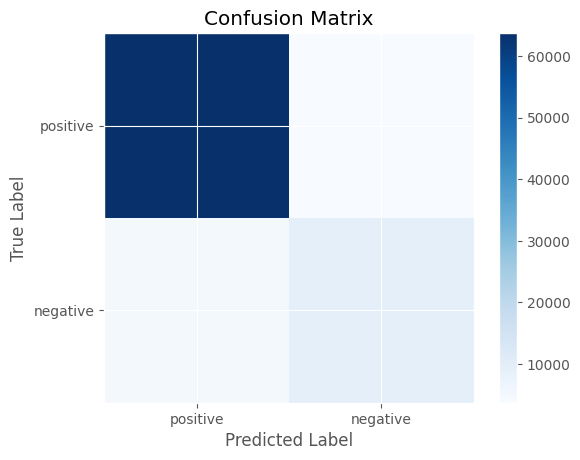

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, predictions, labels=["positive", "negative"])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(["positive", "negative"]))
plt.xticks(tick_marks, ["positive", "negative"])
plt.yticks(tick_marks, ["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()